In [68]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [70]:
from sklearn.datasets import load_boston

In [71]:
boston = load_boston()

In [72]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,u'Number of houses')

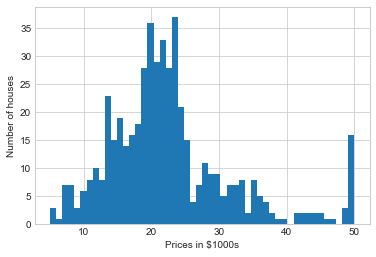

In [73]:
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5,0,u'Number of rooms')

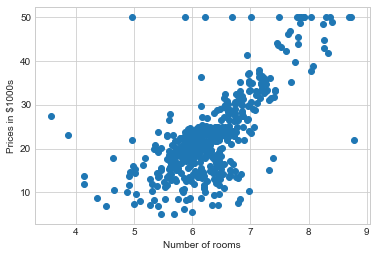

In [74]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Prices in $1000s')
plt.xlabel('Number of rooms')

In [75]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


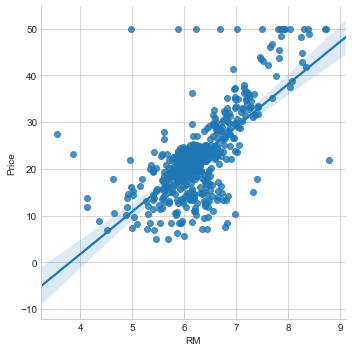

In [77]:
sns.lmplot('RM','Price',data=boston_df)

In [78]:
X = boston_df.RM


In [79]:
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [80]:
Y = boston_df.Price


In [81]:
# [X 1]

X = np.array( [ [ value,1] for value in X])
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [82]:
# to be used in y=mx+b
m , b = np.linalg.lstsq(X,Y)[0]

In [83]:
print " m = %.2f, b = %.2f" %(m,b)

 m = 9.10, b = -34.67


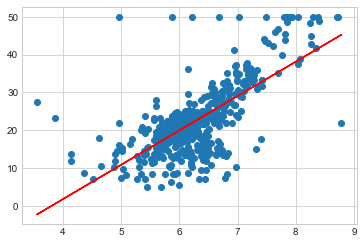

In [84]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x, m*x + b, 'r', label='Best Fit Line')

In [85]:
result = np.linalg.lstsq(X,Y)
j=0
for i in result:
    if j==0:
        print "[m,b]"
        print i
    if j==1:
        print "Error_Total"
        print i
    if j==2:
        print "Rank of matrix a"
        print i
    if j==3:
        print "Singular values of a"
        print i
    j+=1

[m,b]
[  9.10210898 -34.67062078]
Error_Total
[ 22061.87919621]
Rank of matrix a
2
Singular values of a
[ 143.99484122    2.46656609]


In [86]:
error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print "The root mean squared error was %.2f" %rmse

The root mean squared error was 6.60


In [87]:
# Since the rmse corresponds approx to STD, the price of a house won't vary more than 2 times rmse
# IN this case 2*rmse = 2*6.60 = ~13 
# Since amount is in 1000s house price won't be more than ~13k in 95% of the times.

# Scikit Learn Linear Regression

In [88]:
# Scikit linear regression
import sklearn
from sklearn.linear_model import LinearRegression

In [89]:
# linear reg object
lreg=LinearRegression()

In [90]:
X_multi = boston_df.drop('Price',1) # Everything except 'Price'

Y_multi = boston_df.Price

In [91]:
lreg.fit(X_multi,Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print 'The estimated intercept coefficient is %.2f' %lreg.intercept_

print 'The number of coefficients used was %d' %len(lreg.coef_)

The estimated intercept coefficient is 36.49
The number of coefficients used was 13


In [93]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


# Test and Validate Datasets

In [94]:
import sklearn.cross_validation
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [95]:
print X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

(379, 2) (127, 2) (379,) (127,)


In [96]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

In [100]:
print "Fit a model X_train and calculate the MSE with Y_train: %.2f" %np.mean((Y_train-pred_train)**2)

print "Fit a model X_train and calculate the MSE with X_test and Y_test: %.2f" %np.mean((Y_test-pred_test)**2)

Fit a model X_train and calculate the MSE with Y_train: 38.59
Fit a model X_train and calculate the MSE with X_test and Y_test: 58.94


Text(0.5,1,u'Residual Plots')

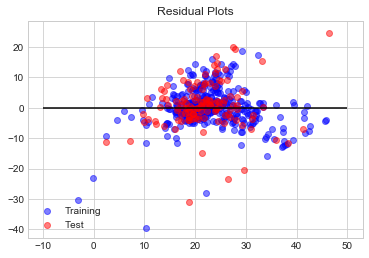

In [101]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')